In [1]:
from heatflow import heat_flow

To = 15
alpha = 35
Tb = 1000
t = [0, 500000, 1E6, 1.5E6, 2E6, 2.5E6, 3E6, 3.5E6, 4E6]

In [2]:
import pickle as p

node_results = p.load(open('exhumationExport.p','rb'))

In [3]:
import numpy as np
from scipy.interpolate import interp1d

surface_gradient = np.zeros(71)

for i in range(71):
    time = np.reshape(node_results[:,0,i],(401,))
    exhumation_rate = np.reshape(node_results[:,1,i], (401,))
    v = interp1d(time,exhumation_rate, kind='cubic')
    z, T = heat_flow(To, Tb, alpha, t, v = v, use_cfl=True)
    surface_gradient[i] = np.mean(np.diff(T[-1,0:5]/(z[1]-z[0])))*1000

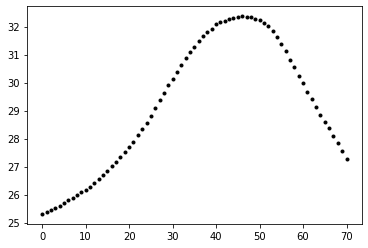

In [4]:
import matplotlib.pylab as plt

plt.plot(range(71),surface_gradient,'k.')

In [5]:
import numpy as np
from scipy.interpolate import interp1d

surface_gradient_2km = np.zeros(71)

for i in range(71):
    time = np.reshape(node_results[:,0,i],(401,))
    exhumation_rate = np.reshape(node_results[:,1,i], (401,))
    v = interp1d(time,exhumation_rate, kind='cubic')
    z, T = heat_flow(To, Tb, alpha, t, v = v, use_cfl=True)
    surface_gradient_2km[i] = np.mean(np.diff(T[-1,0:20]/(z[1]-z[0])))*1000

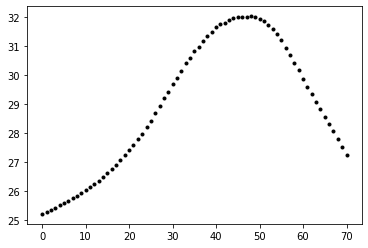

In [12]:
import matplotlib.pylab as plt

plt.plot(range(71),surface_gradient_2km,'k.')